# Exercise 3 - Homogenization

## Part I
*For the Craddock test the accumulated normalized differences s are calculated as follows: si=si−1+ai−bi−(am−bm) where a is the reference series, b is the candidate series, am and bm are their long-term means (s0=0). Open the Excel-file or the R file with the txt-data and calculate si. Afterwards, find the breakpoints in the figure on the right in the Excel-sheet*

In [1]:
# import packages
import pandas as pd
import os
import sys
import datetime as dt
import csv
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.dates as mdates

# read in the data
mypd = pd.read_table("homogenization.txt")

#create datetime column to facilitate analysis and charting
mypd["day"] = 1
mypd["year"] = mypd["Yr"]
mypd["month"] = mypd["Mon"]
mypd["md"] = pd.to_datetime(mypd[["year", "month", "day"]])

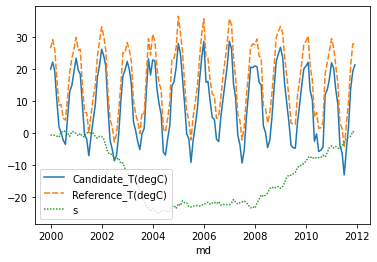

In [2]:
#obtain long term averages for candidate and reference series
candidate_t = np.mean(mypd["Candidate_T(degC)"])
reference_t = np.mean(mypd["Reference_T(degC)"])

# calculate the difference for each observation
mypd["difference"] = mypd["Reference_T(degC)"] - mypd["Candidate_T(degC)"]-reference_t+candidate_t

# sum up differences up to i = 1...j for each observation j
mypd["s"] = mypd.difference.cumsum()
mydata = mypd[["md","Candidate_T(degC)","Reference_T(degC)","s"]]
mydata = mydata.pivot_table(index = "md")
sns.lineplot(data=mydata)
plt.show()

As can be seen from visual inspection, the unique sections are:
- 2000-2001 (constant), 
- 2002-2003 (decreasing), 
- 2004-2007 (constant), 
- 2008-2011 (increasing).

This means the break points are Dec 2001, Dec 2003 and Dec 2007.

## Part II
*If possible, detected breaks are corrected. Thereby the most recent part of the series is considered to be correct, and the earlier segments are corrected towards the recent segments, working backwards. The correction amount is the the difference between the mean value of the difference series before and after the break, and this correction amount is subtracted form the segment before the break (see Climandes for further information). Open the Excel-file and try to correct the breaks you have found in the previous exercise (here’s the solution for Excel).*

In [3]:
# use datetime to slice the dataframe according to the time periods before and after the breaks
a = (mypd["md"] < "2001-12-31")
b = (mypd["md"] < "2003-12-31") & (mypd["md"]> "2001-12-31")
c = (mypd["md"] < "2007-12-31") & (mypd["md"] > "2003-12-31")
d = mypd["md"] > "2007-12-31"

# calculate difference in mean between candidate and reference for each period
mean1 = np.mean(mypd.loc[a]["Candidate_T(degC)"])-np.mean(mypd.loc[a]["Reference_T(degC)"])
mean2 = np.mean(mypd.loc[b]["Candidate_T(degC)"])-np.mean(mypd.loc[b]["Reference_T(degC)"])
mean3 = np.mean(mypd.loc[c]["Candidate_T(degC)"])-np.mean(mypd.loc[c]["Reference_T(degC)"])
mean4 = np.mean(mypd.loc[d]["Candidate_T(degC)"])-np.mean(mypd.loc[d]["Reference_T(degC)"])

# apply the mean correction to each period
mydata1 = mypd.loc[a].copy()
mydata1["corrected"] = mydata1["Candidate_T(degC)"] + mean2-mean1
mydata2 = mypd.loc[b].copy()
mydata2["corrected"] = mydata2["Candidate_T(degC)"] + mean3-mean2
mydata3 = mypd.loc[c].copy()
mydata3["corrected"] = mydata3["Candidate_T(degC)"] + mean4-mean3
mydata4 = mypd.loc[d].copy()
mydata4["corrected"] = mydata4["Candidate_T(degC)"]

# concatonate the periods together
frames = [mydata1,mydata2,mydata3,mydata4]
newdata = pd.concat(frames)

#add column of new corrected values to original dataset
mypd["corrected"] = newdata["corrected"]

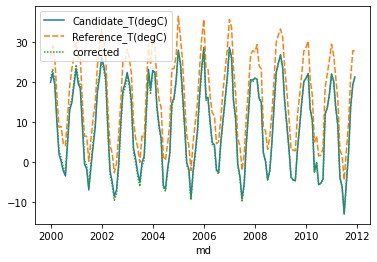

In [4]:
# graph to inspect for errors

graphdata = mypd[["md","Candidate_T(degC)","Reference_T(degC)","corrected"]]
graphdata = graphdata.pivot_table(index = "md")
sns.lineplot(data=graphdata)
plt.show()